In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('..\Initial_data\K5F3\K5F3_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_12200\1378309965.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5F3\K5F3_cor.csv', ";")


,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,68.64057,263.9865,10.039490,0.726673,95.68557,70.74362,5.338432,98.49267,5.197084,2050.198,...,144.1310,3.993395,99.12495,0.467944,14.78545,98.10843,0.553365,15.49541,1121.6630,10.27417
1,67.96342,296.6823,10.008270,1.041015,95.67174,70.77719,7.259575,98.50158,7.083014,2401.326,...,153.3861,4.029810,99.12554,0.689852,17.16026,98.07903,0.785815,15.49235,1183.3680,13.80313
2,67.97134,304.3525,9.970403,1.155531,95.70911,70.85853,7.827801,98.52289,7.630862,2502.082,...,158.3549,4.038913,99.08965,0.771898,17.87385,98.05887,0.870208,15.48917,1222.5440,14.79426
3,68.52765,264.3327,9.942288,0.881754,95.63900,70.81142,6.166122,98.47167,5.997647,2208.733,...,149.2110,4.012344,99.02117,0.577157,15.83145,98.06599,0.668077,15.48194,1168.7110,11.77826
4,68.64672,257.3548,9.830679,0.832744,95.39429,70.65331,5.792712,98.34963,5.636348,2143.463,...,147.1943,4.011959,98.96603,0.540239,15.35997,98.01945,0.632694,15.44315,1242.9170,11.07792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,67.71165,385.3154,5.778424,0.889865,95.26511,70.88328,6.282869,98.30582,6.115492,2230.880,...,154.1835,4.010198,97.85509,0.584148,16.00625,97.97490,0.675078,10.37854,389.2227,11.99963
125,67.66507,371.3847,5.782653,0.878123,95.38406,70.96461,6.115584,98.35878,5.950125,2192.958,...,154.2773,4.007326,97.86667,0.576690,15.74201,97.95896,0.665937,10.37674,375.0227,11.70448
126,67.72541,367.4552,5.732545,0.850102,95.35741,70.90416,5.729732,98.31086,5.572542,2125.430,...,152.3010,4.003948,97.85760,0.557177,15.24988,97.96556,0.644809,10.42944,371.6509,10.99170
127,67.83204,372.1979,5.688241,0.812691,95.12940,70.81817,5.566680,98.26041,5.418845,2100.274,...,150.2400,4.007051,97.82761,0.529393,15.07233,97.93044,0.617610,10.61948,370.5537,10.69063


<Axes: >

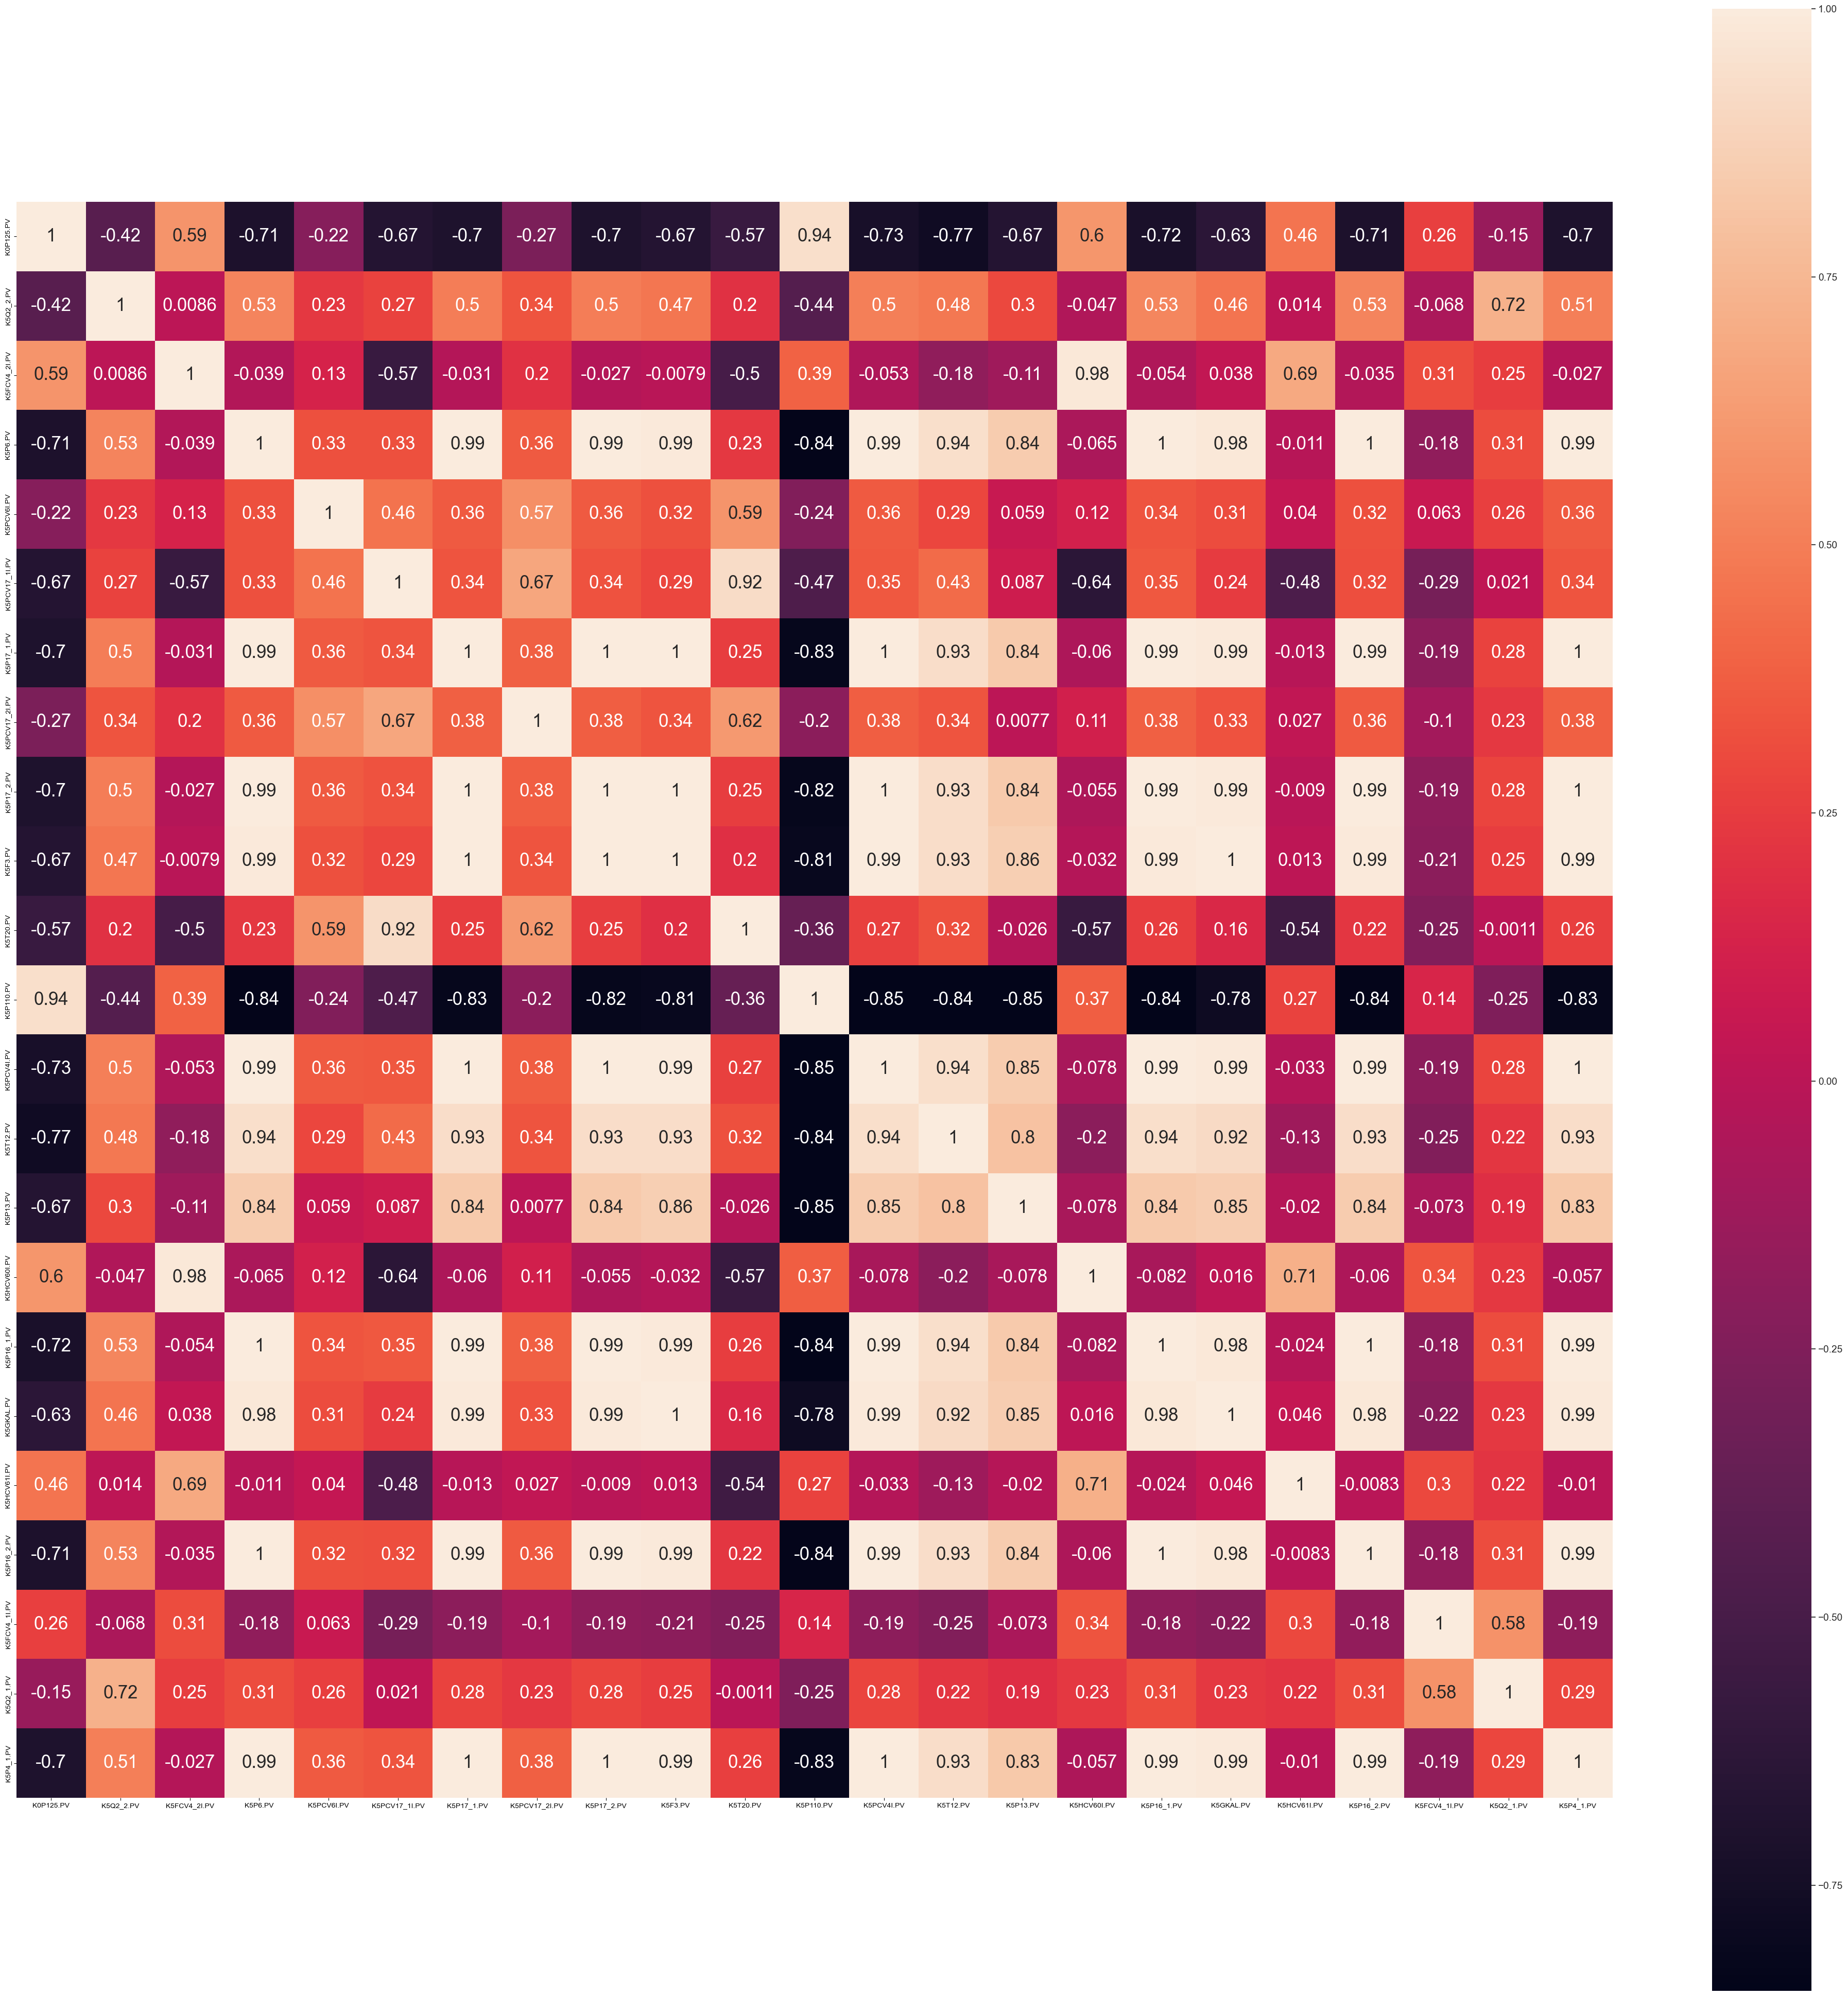

In [4]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [5]:
df = pd.read_csv('..\Initial_data\K5F3\K5F3.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_12200\2342014177.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5F3\K5F3.csv', ";")


,K5F3.PV,K5PCV4I.PV
0,2050.198,28.40488
1,2401.326,32.85442
2,2502.082,34.00441
3,2208.733,30.33545
4,2143.463,29.56043
...,...,...
124,2230.880,30.55424
125,2192.958,30.22802
126,2125.430,29.43637
127,2100.274,29.03940


In [7]:
df=df.dropna()
df=df.round(4)
df=df.drop_duplicates(["K5F3.PV"])
df=df.drop_duplicates(["K5PCV4I.PV"])
df

,K5F3.PV,K5PCV4I.PV
0,2050.20,28.40
1,2401.33,32.85
2,2502.08,34.00
3,2208.73,30.34
4,2143.46,29.56
...,...,...
124,2230.88,30.55
125,2192.96,30.23
126,2125.43,29.44
127,2100.27,29.04


In [16]:
y = df.drop(['K5PCV4I.PV'], axis=1)
x = df.drop(['K5F3.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(0, 100, 100)[:, np.newaxis]

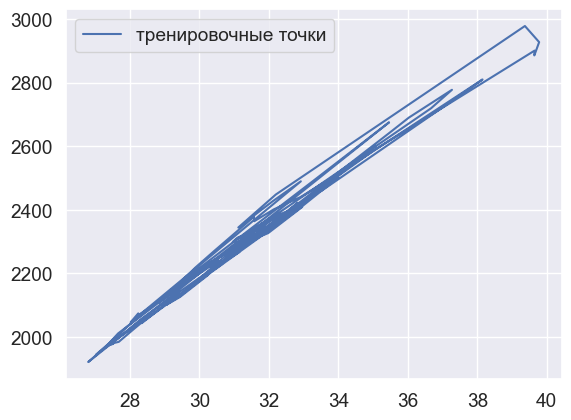

In [12]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


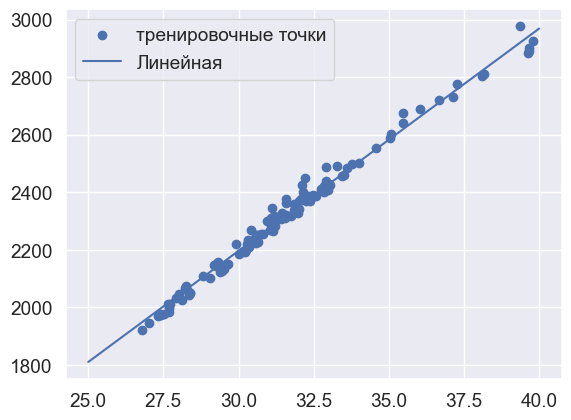

array([0.97226867, 0.99467461])

In [13]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


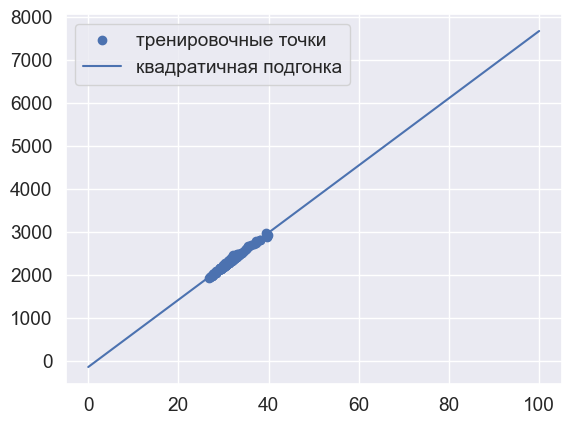

0.9902543483123533

In [18]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

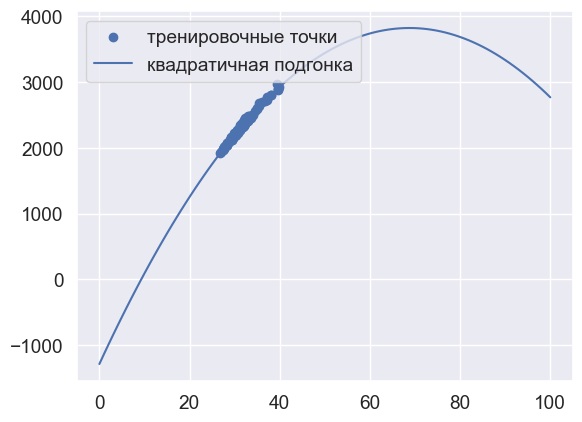

array([0.97226867, 0.99467461])

In [17]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

In [21]:
import pickle
filename = '../model/K5F3.sav'
pickle.dump(clf, open(filename, 'wb'))

In [23]:
loaded_model = pickle.load(open("../model/K5F3.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)

In [26]:
a=np.array([[70]])

In [27]:
loaded_model.predict(a)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([[5322.08378249]])